In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'/Users/abhayanand/Downloads/Drone Project'

In [3]:
os.chdir('/Users/abhayanand/Downloads/Drone Project/EMG_data_for_gestures-master/02')

In [20]:
data1 = pd.read_csv('2_raw_data_14-21_22.03.16.txt', sep="\t")
data1.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,-0.00001,0.00001,-0.00003,-0.00004,-0.00001,0.00000,0.00000,0.0,0
1,5,-0.00001,0.00001,-0.00003,-0.00004,-0.00001,0.00000,0.00000,0.0,0
2,6,-0.00002,-0.00003,-0.00001,0.00007,0.00001,0.00001,-0.00002,0.0,0
3,7,-0.00002,-0.00003,-0.00001,0.00007,0.00001,0.00001,-0.00002,0.0,0
4,8,-0.00002,-0.00003,-0.00001,0.00007,0.00001,0.00001,-0.00002,0.0,0


In [23]:
data1.index = data1['time']
df = data1
df

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
time,,,,,,,,,,
1,1,-0.00001,0.00001,-0.00003,-0.00004,-0.00001,0.00000,0.00000,0.00000,0
5,5,-0.00001,0.00001,-0.00003,-0.00004,-0.00001,0.00000,0.00000,0.00000,0
6,6,-0.00002,-0.00003,-0.00001,0.00007,0.00001,0.00001,-0.00002,0.00000,0
7,7,-0.00002,-0.00003,-0.00001,0.00007,0.00001,0.00001,-0.00002,0.00000,0
8,8,-0.00002,-0.00003,-0.00001,0.00007,0.00001,0.00001,-0.00002,0.00000,0
...,...,...,...,...,...,...,...,...,...,...
66232,66232,0.00001,0.00003,0.00001,0.00000,-0.00010,-0.00001,-0.00002,-0.00003,0
66233,66233,0.00001,0.00003,0.00001,0.00000,-0.00010,-0.00001,-0.00002,-0.00003,0
66234,66234,0.00001,0.00003,0.00001,0.00000,-0.00010,-0.00001,-0.00002,-0.00003,0


<Axes: xlabel='time'>

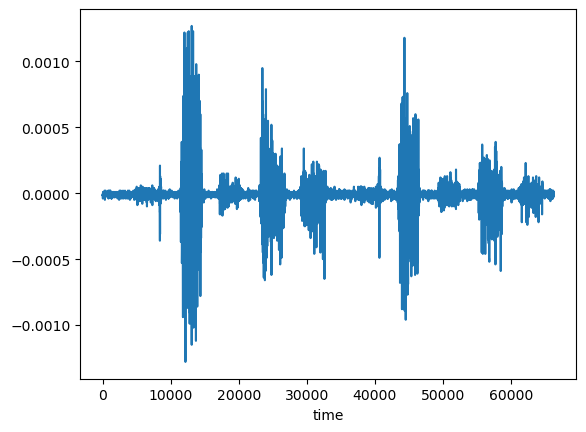

In [24]:
temp = df['channel1']
temp.plot()

In [61]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [62]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((64099, 5, 1), (64099,))

In [63]:
X_train1, y_train1 = X1[:54875], y1[:54875]
X_val1, y_val1 = X1[54875:60000], y1[54875:60000]
X_test1, y_test1 = X1[60000:], y1[60000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((54875, 5, 1), (54875,), (5125, 5, 1), (5125,), (4099, 5, 1), (4099,))

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model1.compile(loss=MeanSquaredError(), optimizer=optimizer, metrics=[RootMeanSquaredError()])

In [66]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1712/1715 [============================>.] - ETA: 0s - loss: 4.5523e-08 - root_mean_squared_error: 2.1336e-04INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1715/1715 [==============================] - 12s 6ms/step - loss: 4.5474e-08 - root_mean_squared_error: 2.1325e-04 - val_loss: 6.8142e-09 - val_root_mean_squared_error: 8.2548e-05
Epoch 2/10
1715/1715 [==============================] - 5s 3ms/step - loss: 3.3875e-08 - root_mean_squared_error: 1.8405e-04 - val_loss: 4.5319e-08 - val_root_mean_squared_error: 2.1288e-04
Epoch 3/10
1715/1715 [==============================] - 5s 3ms/step - loss: 3.1148e-08 - root_mean_squared_error: 1.7649e-04 - val_loss: 1.8170e-08 - val_root_mean_squared_error: 1.3479e-04
Epoch 4/10
1715/1715 [==============================] - 5s 3ms/step - loss: 2.6867e-08 - root_mean_squared_error: 1.6391e-04 - val_loss: 8.5594e-09 - val_root_mean_squared_error: 9.2517e-05
Epoch 5/10
1715/1715 [==============================] - 5s 3ms/step - loss: 2.5288e-08 - root_mean_squared_error: 1.5902e-04 - val_loss: 2.6236e-08 - val_root_mean_squared_error: 1.6198e-04
Epoch 6/10
1715/1715 [==============================] - 5s 3

In [67]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [68]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1715/1715 [==============================] - 2s 1ms/step


,Train Predictions,Actuals
0,1.209788e-06,-0.00002
1,1.064269e-06,-0.00002
2,9.527430e-07,-0.00001
3,1.288950e-06,-0.00001
4,1.540640e-06,-0.00001
...,...,...
54870,7.166062e-06,0.00004
54871,7.166062e-06,0.00004
54872,7.166062e-06,0.00004
54873,7.166062e-06,0.00004


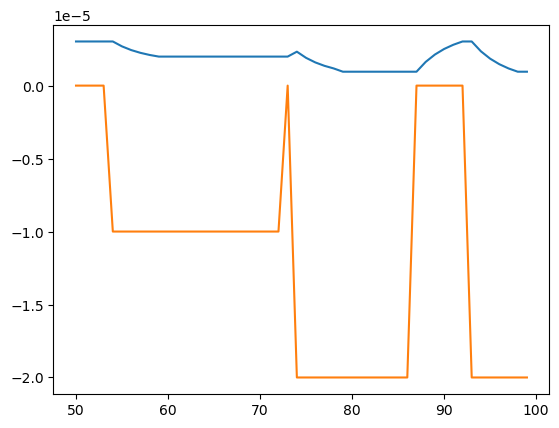

In [69]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [70]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

161/161 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,7.166062e-06,0.00004
1,7.166062e-06,0.00018
2,1.188135e-05,0.00018
3,1.540128e-05,0.00018
4,1.806137e-05,0.00018
...,...,...
5120,5.899929e-07,-0.00003
5121,-8.312054e-08,-0.00003
5122,-8.312054e-08,-0.00003
5123,-8.312054e-08,-0.00003


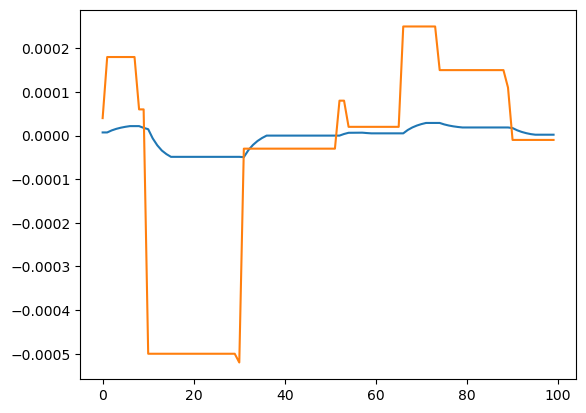

In [71]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

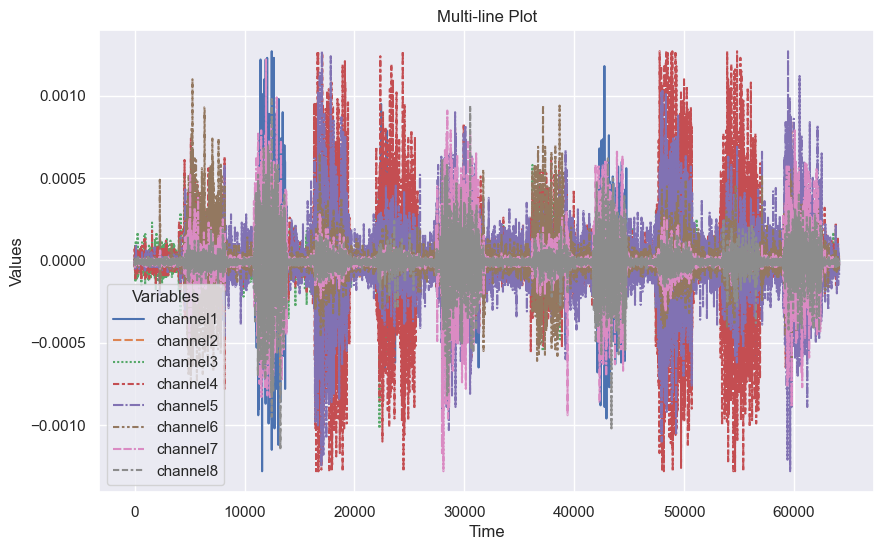

In [9]:
sns.set(style="darkgrid")

# Plot
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.lineplot(data=data1.drop(['time','class'], axis=1))  # Drop 'time' column for plotting
plt.xlabel('Time')  # Label x-axis
plt.ylabel('Values')  # Label y-axis
plt.title('Multi-line Plot')  # Title of the plot
plt.legend(title='Variables')  # Show legend with variable names
plt.show()

<Axes: xlabel='time', ylabel='channel1'>

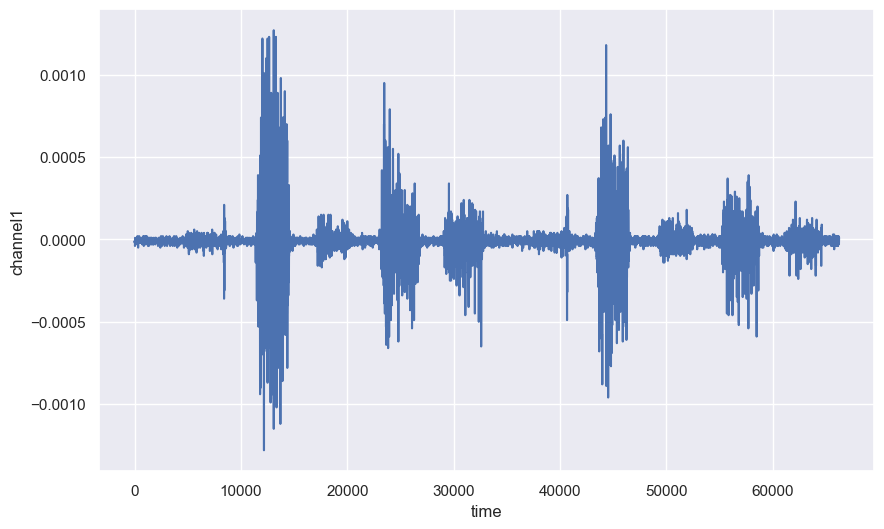

In [10]:
plt.figure(figsize=(10, 6))  # Adjust size if needed

sns.lineplot(data = data1.get(['time','channel1']), x='time', y='channel1')


<Axes: xlabel='time', ylabel='channel2'>

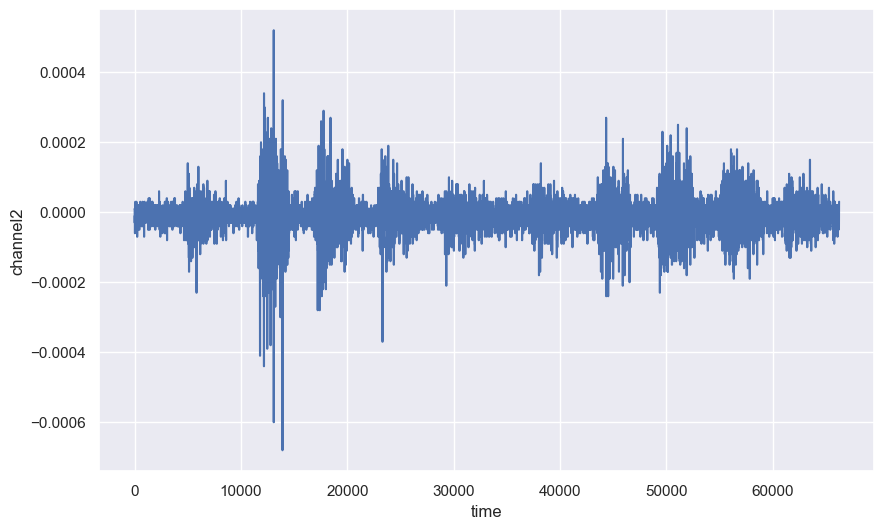

In [11]:
plt.figure(figsize=(10, 6))  # Adjust size if needed

sns.lineplot(data = data1.get(['time','channel2']), x='time', y='channel2')


In [12]:
plt.figure(figsize=(10, 6))  o# Adjust size if needed

sns.lineplot(data = data1.get(['time','channel3']), x='time', y='channel3')


SyntaxError: invalid syntax (3620151557.py, line 1)

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust size if needed

sns.lineplot(data = data1.get(['time','channel4']), x='time', y='channel4')

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust size if needed

sns.lineplot(data = data1.get(['time','channel5']), x='time', y='channel5')


In [ ]:
plt.figure(figsize=(10, 6))  # Adjust size if needed

sns.lineplot(data = data1.get(['time','channel6']), x='time', y='channel6')


In [ ]:
plt.figure(figsize=(10, 6))  # Adjust size if needed

sns.lineplot(data = data1.get(['time','channel7']), x='time', y='channel7')


In [ ]:
plt.figure(figsize=(10, 6))  # Adjust size if needed

sns.lineplot(data = data1.get(['time','channel8']), x='time', y='channel8')


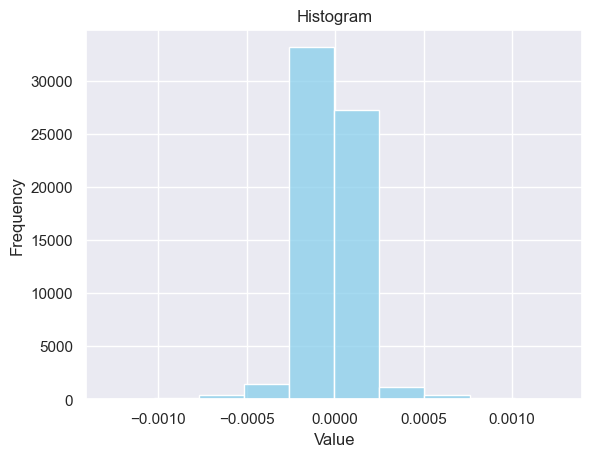

In [16]:
# Plot histogram
sns.histplot(data1.get('channel1'), bins=10, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()


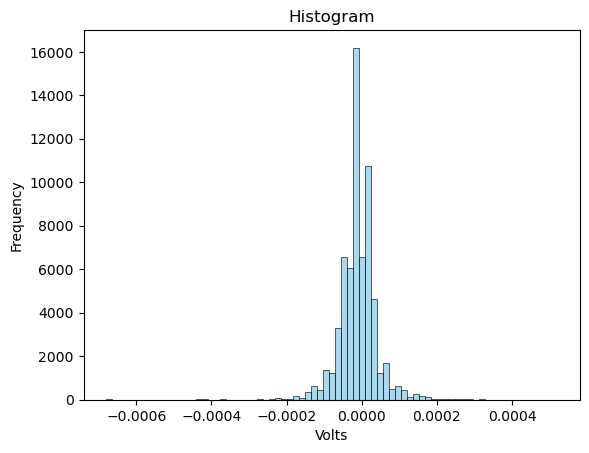

In [10]:
# Plot histogram
sns.histplot(data1.get('channel2'), bins=75, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Volts')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

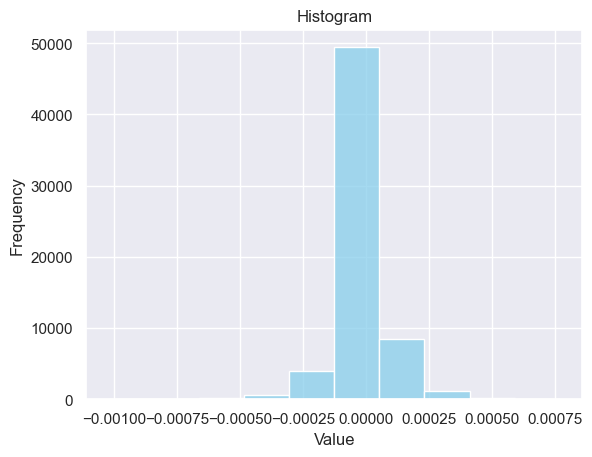

In [18]:
# Plot histogram
sns.histplot(data1.get('channel3'), bins=10, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

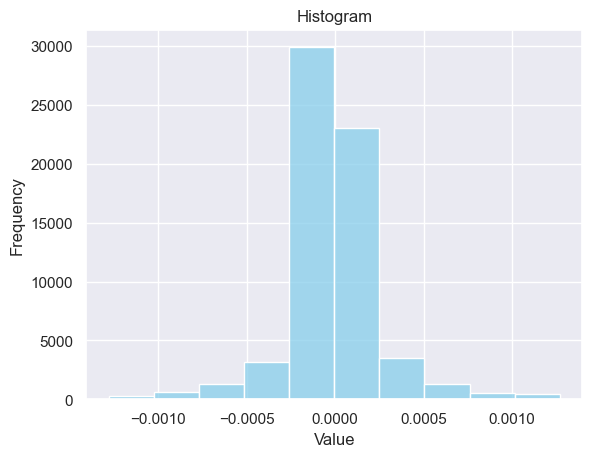

In [19]:
# Plot histogram
sns.histplot(data1.get('channel4'), bins=10, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

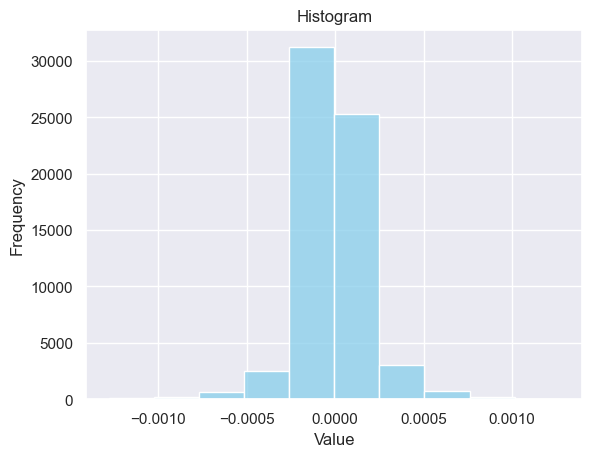

In [20]:
# Plot histogram
sns.histplot(data1.get('channel5'), bins=10, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

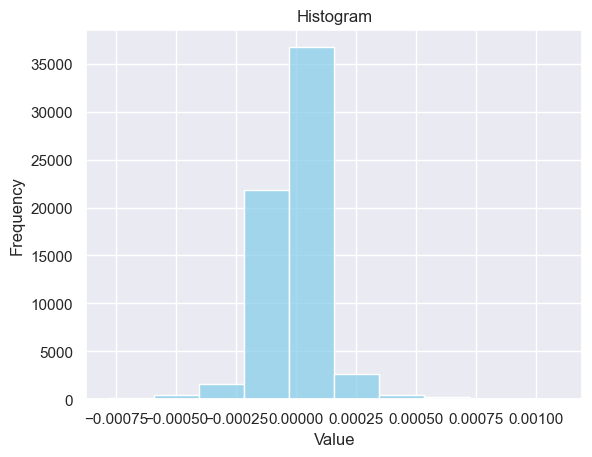

In [21]:
# Plot histogram
sns.histplot(data1.get('channel6'), bins=10, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

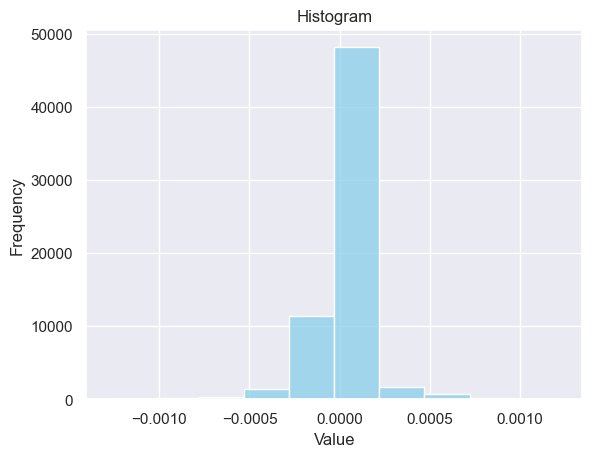

In [22]:
# Plot histogram
sns.histplot(data1.get('channel7'), bins=10, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

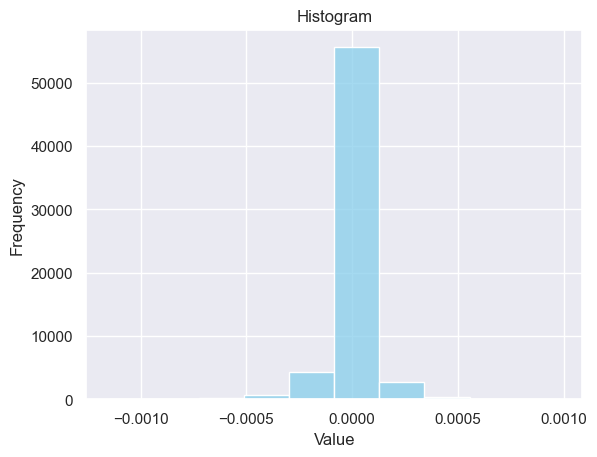

In [23]:
# Plot histogram
sns.histplot(data1.get('channel8'), bins=10, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
